# Reinforcement Learning

# Online control

This notebook presents SARSA and Q-learning for the maze.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from copy import deepcopy

In [2]:
from model import Maze
from agent import Agent, OnlineControl

In [3]:
maze = Maze()
maze_map = np.load('maze_small.npy')
maze.set_parameters(maze_map, (1, 0), [(3, 8)])
maze = Maze()

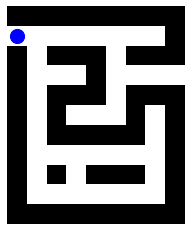

In [4]:
maze.display()

## SARSA

In [5]:
class SARSA(OnlineControl):
    """Online control by SARSA."""
        
    def update_action_values(self):
        """Update action-values online."""
        self.environment.init_state()
        state = deepcopy(self.environment.state)
        state_id = self.state_id[self.environment.encode(state)]
        action = self.get_best_action_randomized(state)
        action_id = self.action_id[action]
        action_values = self.action_values
        for t in range(self.n_steps):
            reward, stop = self.environment.step(action)
            if stop:
                break
            state_next = self.environment.state
            action_next = self.get_best_action_randomized(state_next)            
            state_id_next = self.state_id[self.environment.encode(state_next)]
            action_id_next = self.action_id[action_next]
            gain = reward + self.gamma * action_values[state_id_next, action_id_next]
            action_values[state_id, action_id] += self.alpha * (gain - action_values[state_id, action_id])
            state, state_id = deepcopy(state_next), state_id_next
            action, action_id = action_next, action_id_next

In [6]:
algo = SARSA(maze)

In [7]:
for t in range(10000):
    algo.update_action_values()

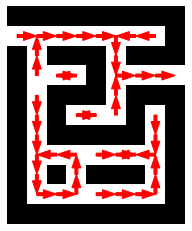

In [8]:
policy = algo.get_policy()
maze.display_policy(policy)

## Q learning

## To do

* Implement and test Q-learning.

In [9]:
class QLearning(OnlineControl):
    """Online control by Q-learning."""
        
    def update_action_values(self):
        """Update action-values online."""
        self.environment.init_state()
        state = deepcopy(self.environment.state)
        state_id = self.state_id[self.environment.encode(state)]
        action = self.get_best_action_randomized(state)
        action_id = self.action_id[action]
        action_values = self.action_values
        for t in range(self.n_steps):
            reward, stop = self.environment.step(action)
            if stop:
                break
            # to be completed

In [10]:
algo = QLearning(maze)

In [11]:
for t in range(100):
    algo.update_action_values()

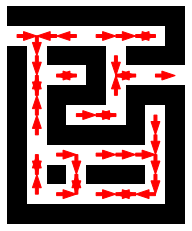

In [12]:
policy = algo.get_policy()
maze.display_policy(policy)